Notebook: [https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/Support%20Vector%20Machines.ipynb](https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/Support%20Vector%20Machines.ipynb)

In [3]:
from IPython.display import Image
url = 'http://docs.opencv.org/_images/separating-lines.png'
Image(url)

HTTPError: HTTP Error 403: Forbidden

In [ ]:
url= 'http://docs.opencv.org/_images/optimal-hyperplane.png'
Image(url)

So how do we actually mathematically compute that optimal hyperplane? I'll explain with a very brief overview below in Part 3, but I highly suggest you check out the full explanation on [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine) or in the lecture videos following Part 3. Here video [tutorial](https://www.youtube.com/watch?v=efR1C6CvhmE)

## Part 3: Computing the Hyperplane
Let's go ahead and start by defining the Hyperplane in this case with the equation of a line, where Beta tranposed is the known weight vector of the features we've seen before and Beta nought is the bias.

$$ f(x) = \beta_{0} + \beta^{T} x $$
There are an infinite number of ways we could scale the weight vector and the bias, but remember we want to maximize the margin between the two classes. So we realize through some math (explained in detail the videos below) can set this as:

$$ |\beta_{0} + \beta^{T} x| = 1 $$
where x symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. These support vectors are filled in with color in the image above. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point x and the hyperplane (Beta,Beta0)is:

$$\mathrm{distance} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||}.$$
In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is

$$\mathrm{distance}_{\text{ support vectors}} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||} = \frac{1}{||\beta||}$$
Recall that the margin introduced in the previous section, here denoted as M, is twice the distance to the closest examples:

$$M = \frac{2}{||\beta||}$$
Finally, the problem of maximizing M is equivalent to the problem of minimizing a function L(Beta) subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples xi.

Formally,

$$\min_{\beta, \beta_{0}} L(\beta) = \frac{1}{2}||\beta||^{2} \text{ subject to } y_{i}(\beta^{T} x_{i} + \beta_{0}) \geq 1 \text{ } \forall i$$
where yi represents each of the labels of the training examples.

This is a problem of [Lagrangian optimization](https://en.wikipedia.org/wiki/Lagrange_multiplier) that can be solved using Lagrange multipliers to obtain the weight vector Beta and the bias Beta0 of the optimal hyperplane.

If we want to do non-linear classification we can employ the [kernel](https://en.wikipedia.org/wiki/Kernel_method) trick. Using the kernel trick we can "slice" the feature space with a Hyperplane. For a quick illustration of what this looks like, check out both the image and the video below!

In [ ]:
# Kernel Trick for the Feature Space (tutorial: https://www.youtube.com/watch?v=Toet3EiSFcM&t=0s)
url='http://i.imgur.com/WuxyO.png'
Image(url)


## Part 5: SVM with Sci Kit Learn

Now we are ready to jump into some Python code and Sci Kit Learn, we'll start with some basic imports and we will import Sci Kit Learn along the way while we use it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Now we will import the [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classification) from the [SVM library of Sci Kit Learn](http://scikit-learn.org/stable/modules/svm.html), I encourage you to check out the other types of SVM options in the Sci Kit Learn Documentation!

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=3)

In [9]:
model.fit(X_train, Y_train)

SVC()

In [10]:
from sklearn import metrics

In [11]:
predicted = model.predict(X_test)

expected = Y_test

In [12]:
print(metrics.accuracy_score(expected, predicted))

0.95


Looks like we have achieved a 97.4 % accuracy with Support Vector Classification!

Now that we've gone through a basic implementation of SVM lets go ahead and quickly explore the various kernel types we can use for classification. We can do this by plotting out the boundaries created by each kernel type! We'll start with some imports and by setting up the data.

The four methods we will explore are two linear models, a [Gaussian Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function),and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

  LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

  LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [13]:
from sklearn import svm

In [14]:
X = iris.data[:,:2] # take all the arrays, and from each array, the first two

Y = iris.target

In [15]:
C = 1.0 # Regularization parameter for all the models

In [16]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [17]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [18]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [19]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\abelmescua\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
h = 0.02 # Step parameter

# X axis min and max
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

In [28]:
# Y axis min and max
y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [29]:
# 
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [30]:
titles = ['SVC with linear kernel',
        'LinearSVC (linear kernel)',
        'SVC with RBF kernel',
        'SVC with polynomial (degree 3) kernel']

C:\Users\ABELME~1\AppData\Local\Temp/ipykernel_17708/3143670541.py:12: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5, linewidths=0)
C:\Users\ABELME~1\AppData\Local\Temp/ipykernel_17708/3143670541.py:12: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5, linewidths=0)
C:\Users\ABELME~1\AppData\Local\Temp/ipykernel_17708/3143670541.py:12: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5, linewidths=0)
C:\Users\ABELME~1\AppData\Local\Temp/ipykernel_17708/3143670541.py:12: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5, linewidths=0)


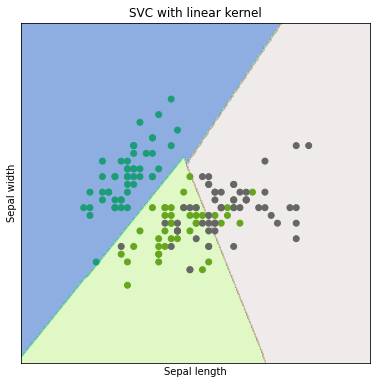

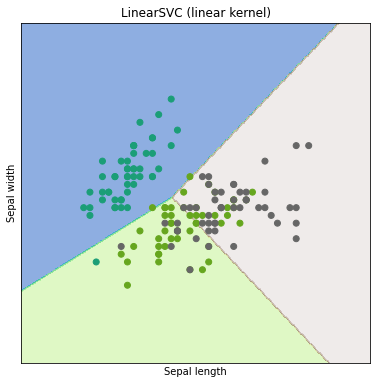

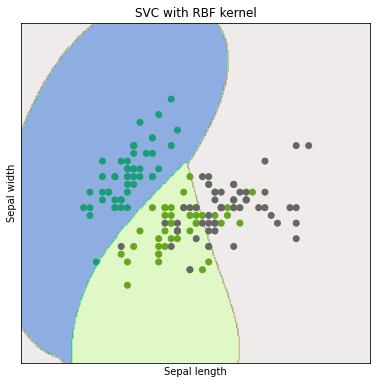

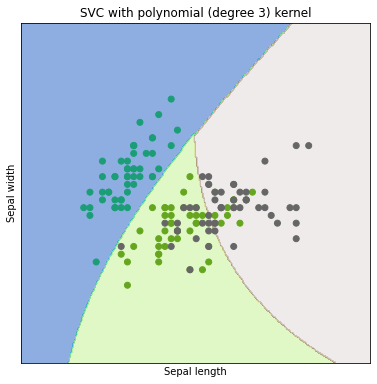

In [31]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(15,15))

    plt.subplot(2,2,i+1)

    plt.subplots_adjust(wspace=0.4,hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5, linewidths=0)

    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


## Part 6: Additional Resources

1.) [Microsoft Research Paper SVM Tutorial](https://www.microsoft.com/en-us/research/publication/a-tutorial-on-support-vector-machines-for-pattern-recognition/?from=http%3A%2F%2Fresearch.microsoft.com%2Fpubs%2F67119%2Fsvmtutorial.pdf)

2.) [StatSoft Online Textbook](http://www.statsoft.com/Textbook/Support-Vector-Machines)

3.) [Sci Kit Learn Documentation](https://scikit-learn.org/stable/modules/svm.html)

4.) [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine)

5.) [Columbia Lecture Slides](http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf)

6.) Andrew Ng's Class Notes